In [1]:
import pandas as pd

In [2]:
import torch

In [38]:
df= pd.read_csv("pwine_dataset.csv")
df.head()

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [39]:
df['style'].value_counts()

1    4898
0    1599
Name: style, dtype: int64

In [40]:
#independent features/attributes
X= df.drop(['style', 'Unnamed: 0'], axis=1).values

#target variable
y= df['style'].values

In [41]:
print(X.shape)
print(y.shape)

(6497, 12)
(6497,)


In [42]:
X

array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  5.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [45]:
##creating tensors
X_train= torch.FloatTensor(X_train).cuda()
X_test= torch.FloatTensor(X_test).cuda()
y_train= torch.LongTensor(y_train).cuda()
y_test= torch.LongTensor(y_test).cuda()

In [46]:
X_train.device

device(type='cuda', index=0)

In [61]:
#Creating model with pytorch

class ANN_Model(nn.Module):
    def __init__(self, input_features=12, first_hidden_layer=20, second_hidden_layer=20, out_features=2):
        super().__init__()
        self.f_connected1= nn.Linear(input_features, first_hidden_layer)
        self.f_connected2= nn.Linear(first_hidden_layer, second_hidden_layer)
        self.out= nn.Linear(second_hidden_layer, out_features)

    def forward(self, x):
        x= F.relu(self.f_connected1(x))
        x= F.relu(self.f_connected2(x))
        x= self.out(x)
        return x


In [62]:
##instantiate the torch model i.e ANN model
torch.manual_seed(20)
model= ANN_Model()

In [63]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=12, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [64]:
##before using cuda function
for i in model.parameters():
    print(i.is_cuda)

False
False
False
False
False
False


In [65]:
model= model.cuda()

In [66]:
#after using cuda function
for i in model.parameters():
    print(i.is_cuda)

True
True
True
True
True
True


In [67]:
##For backward propagation , we first define loss and set the optimizer
loss_function= nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(), lr= 0.01)

In [68]:
import time
start_time=time.time()
epochs=10000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(time.time()-start_time)

Epoch number: 1 and the loss : 5.214406490325928
Epoch number: 11 and the loss : 0.6961742639541626
Epoch number: 21 and the loss : 0.24182283878326416
Epoch number: 31 and the loss : 0.2264426201581955
Epoch number: 41 and the loss : 0.21434764564037323
Epoch number: 51 and the loss : 0.20587241649627686
Epoch number: 61 and the loss : 0.19827647507190704
Epoch number: 71 and the loss : 0.19293077290058136
Epoch number: 81 and the loss : 0.18848644196987152
Epoch number: 91 and the loss : 0.18467825651168823
Epoch number: 101 and the loss : 0.18115372955799103
Epoch number: 111 and the loss : 0.17641626298427582
Epoch number: 121 and the loss : 0.17105211317539215
Epoch number: 131 and the loss : 0.16411162912845612
Epoch number: 141 and the loss : 0.15512391924858093
Epoch number: 151 and the loss : 0.14403265714645386
Epoch number: 161 and the loss : 0.13184542953968048
Epoch number: 171 and the loss : 0.12015262991189957
Epoch number: 181 and the loss : 0.11029725521802902
Epoch nu

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

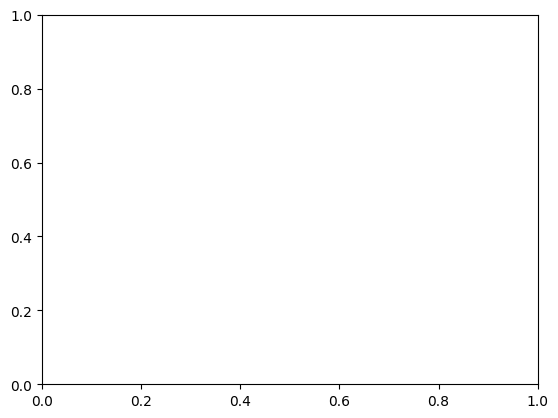

In [70]:
plt.plot(range(epochs), final_losses)
plt.ylabel('loss')
plt.xlabel('Epochs')

In [71]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
1
1
1
1
1
1
1
0
1
0
1
1
0
1
1
1
0
1
0
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
0
0
0
0
1
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
0
1
1
1
1
1
0
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
0
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
0
1
0
1
1
1
1
0
0
1
0
1
1
1
1
1
0
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
0
1
1
0
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
0
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
0
0
1
1
1
1
0
0
0
1
1
0
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
0
1
0
0
0
0
0
1
0
1
1
1
1
1
0
1
1
1
1
0
0
1
0
1
1
0
1
1
0
0
1
1
1
0
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
0
0
1
1
1
1
1
0
1
1
1
1
1
1
1
0
0
1
1
0
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
0
0
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
0
1
0
1
1


In [72]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.